In [1]:
#Importing the necessary libraries
import pandas as pd 
import datetime, math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder,StandardScaler

## Importing data

In [2]:
#Reading the dataset
houseprice_df = pd.read_csv('houseprice_data.csv')

In [3]:
print(houseprice_df.head(5))

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

In [4]:
print(houseprice_df.dtypes)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
#Summarizing our dataset
print(houseprice_df.describe().transpose())

                 count           mean            std         min         25%  \
price          21613.0  540182.158793  367362.231718  75000.0000  321950.000   
bedrooms       21613.0       3.370842       0.930062      0.0000       3.000   
bathrooms      21613.0       2.114757       0.770163      0.0000       1.750   
sqft_living    21613.0    2079.899736     918.440897    290.0000    1427.000   
sqft_lot       21613.0   15106.967566   41420.511515    520.0000    5040.000   
floors         21613.0       1.494309       0.539989      1.0000       1.000   
waterfront     21613.0       0.007542       0.086517      0.0000       0.000   
view           21613.0       0.234303       0.766318      0.0000       0.000   
condition      21613.0       3.409430       0.650743      1.0000       3.000   
grade          21613.0       7.656873       1.175459      1.0000       7.000   
sqft_above     21613.0    1788.390691     828.090978    290.0000    1190.000   
sqft_basement  21613.0     291.509045   

## Data cleaning

In [6]:
#Removing duplicate values in a dataset
print(houseprice_df.shape)
houseprice_df.drop_duplicates(inplace=True)
print(houseprice_df.shape)

(21613, 19)
(21608, 19)


In [7]:
houseprice_df['bathrooms'] = np.ceil(houseprice_df['bathrooms'])

In [8]:
houseprice_df['bathrooms_per_room'] = houseprice_df['bedrooms']/houseprice_df['bathrooms']

In [9]:
#Printing out the summary of a dataset to check if there are null values present in our dataset
print(houseprice_df.apply(lambda x: sum(x.isnull()), axis=0))

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
bathrooms_per_room    7
dtype: int64


In [10]:
houseprice_df.dropna(inplace=True)

In [11]:
print(houseprice_df['bathrooms'].value_counts(sort=True))

3.0    9362
2.0    6431
1.0    3928
4.0    1611
5.0     223
6.0      33
7.0       6
8.0       4
0.0       3
Name: bathrooms, dtype: int64


In [12]:
print(houseprice_df['bedrooms'].value_counts(sort=True))

3     9821
4     6881
2     2759
5     1601
6      272
1      199
7       38
8       13
0        6
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


In [13]:
print(houseprice_df['grade'].value_counts(sort=True))

7     8978
8     6064
9     2612
6     2038
10    1134
11     399
5      242
12      89
4       29
13      13
3        3
Name: grade, dtype: int64


In [14]:
print(houseprice_df['condition'].value_counts(sort=True))

3    14022
4     5677
5     1701
2      172
1       29
Name: condition, dtype: int64


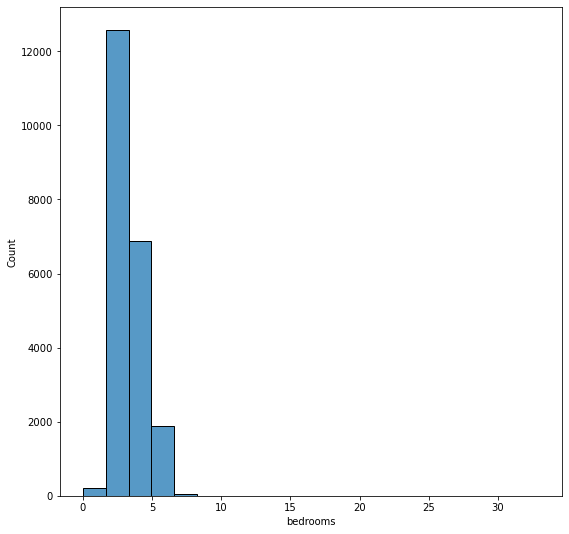

In [15]:
plt.figure(figsize=(8,8))
sns.histplot(data=houseprice_df, x='bedrooms', bins=20)
plt.gcf().set_size_inches(9,9)

In [16]:
#Dropping all houses with 0 bedrooms and bedrooms
houseprice_df = houseprice_df.drop(index=houseprice_df[houseprice_df['bedrooms'] == 0].index)
houseprice_df = houseprice_df.drop(index=houseprice_df[houseprice_df['bathrooms'] == 0].index)
houseprice_df = houseprice_df.drop(index=houseprice_df[houseprice_df['bedrooms'] > 9].index)

In [17]:
#Dropping all houses having bathrooms 
houseprice_df = houseprice_df.drop(index=houseprice_df[houseprice_df['bathrooms'] >= 7.0].index)

In [18]:
houseprice_df = houseprice_df.drop(index=houseprice_df[houseprice_df['grade'] == 3].index)
houseprice_df = houseprice_df.drop(index=houseprice_df[houseprice_df['grade'] == 1].index)

In [19]:
# Calculating house age for all houses in a dataset
current_year = datetime.datetime.now().year
houseprice_df['house_age'] = current_year - houseprice_df['yr_built'] 

In [20]:
#Since bathrooms number can't be a float value we will convert it into integer value by 
houseprice_df['bathrooms'] = np.ceil(houseprice_df['bathrooms'])

## 1. Data Cleaning 

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

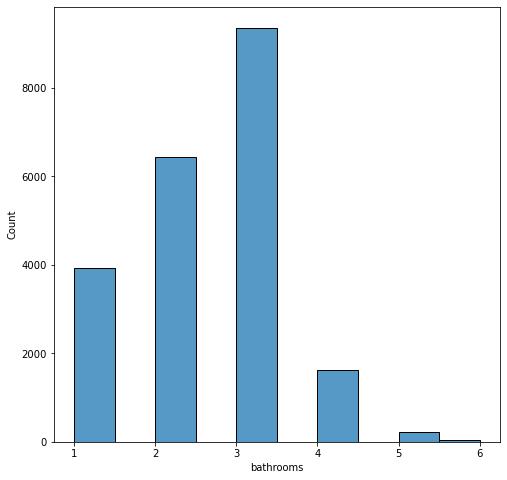

In [21]:
plt.figure(figsize=(8,8))
sns.histplot(data=houseprice_df, x='bathrooms', bins=10)

## 2. Getting Insight of the Data

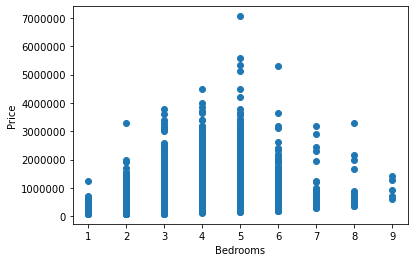

<Figure size 21600x21600 with 0 Axes>

In [22]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above','yr_built', 'house_age',
       'sqft_basement','sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots()
plt.scatter(houseprice_df['bedrooms'],houseprice_df['price'])
plt.ticklabel_format(style='plain')
plt.figure(figsize=(300, 300))
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
plt.show()

## How location determines the price of the house?

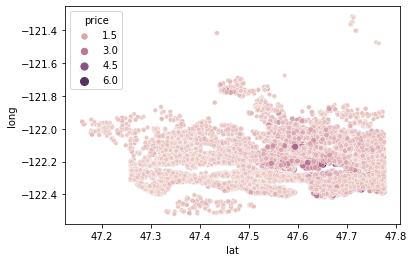

In [23]:
sns.scatterplot(data=houseprice_df, x='lat', y='long', hue='price', size='price',color="0.9")
plt.savefig('Location_vs_price.jpeg', dpi=120)

In [24]:
houseprice_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathrooms_per_room,house_age
count,2.157600e+04,21576.000000,21576.000000,21576.000000,2.157600e+04,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,...,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000
mean,5.390259e+05,3.369485,2.438033,2077.144095,1.508057e+04,1.493674,0.007508,0.233315,3.409854,7.656192,...,290.789535,1970.996617,84.084538,98077.958009,47.560077,-122.213986,1986.069290,12745.193548,1.567268,51.003383
std,3.593356e+05,0.897130,0.916064,905.346007,4.137482e+04,0.539511,0.086327,0.764372,0.650543,1.169675,...,439.642163,29.367497,400.955998,53.513213,0.138582,0.140726,684.403846,27245.388218,0.682530,29.367497
min,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.333333,7.000000
25%,3.220000e+05,3.000000,2.000000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000,1.000000,25.000000
50%,4.500000e+05,3.000000,3.000000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,1.333333,47.000000
75%,6.450000e+05,4.000000,3.000000,2550.000000,1.066675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10080.000000,2.000000,71.000000
max,7.060000e+06,9.000000,6.000000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.000000,122.000000


## Univariate Analysis

**Plotting histograms for all features to see the distribution.**

In [25]:
houseprice_df['grade'].value_counts()

7     8969
8     6063
9     2611
6     2038
10    1134
11     396
5      242
12      86
4       27
13      10
Name: grade, dtype: int64

In [26]:
houseprice_df['price'].value_counts(bins=4)

(71017.999, 1823500.0]    21301
(1823500.0, 3569000.0]      256
(3569000.0, 5314500.0]       16
(5314500.0, 7060000.0]        3
Name: price, dtype: int64

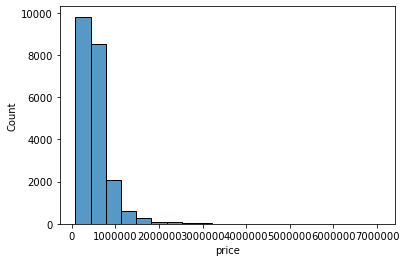

In [27]:
sns.histplot(data=houseprice_df, x='price', bins=20)
plt.ticklabel_format(style='plain')
plt.savefig('price_distribution.jpeg', dpi=100)
plt.show()

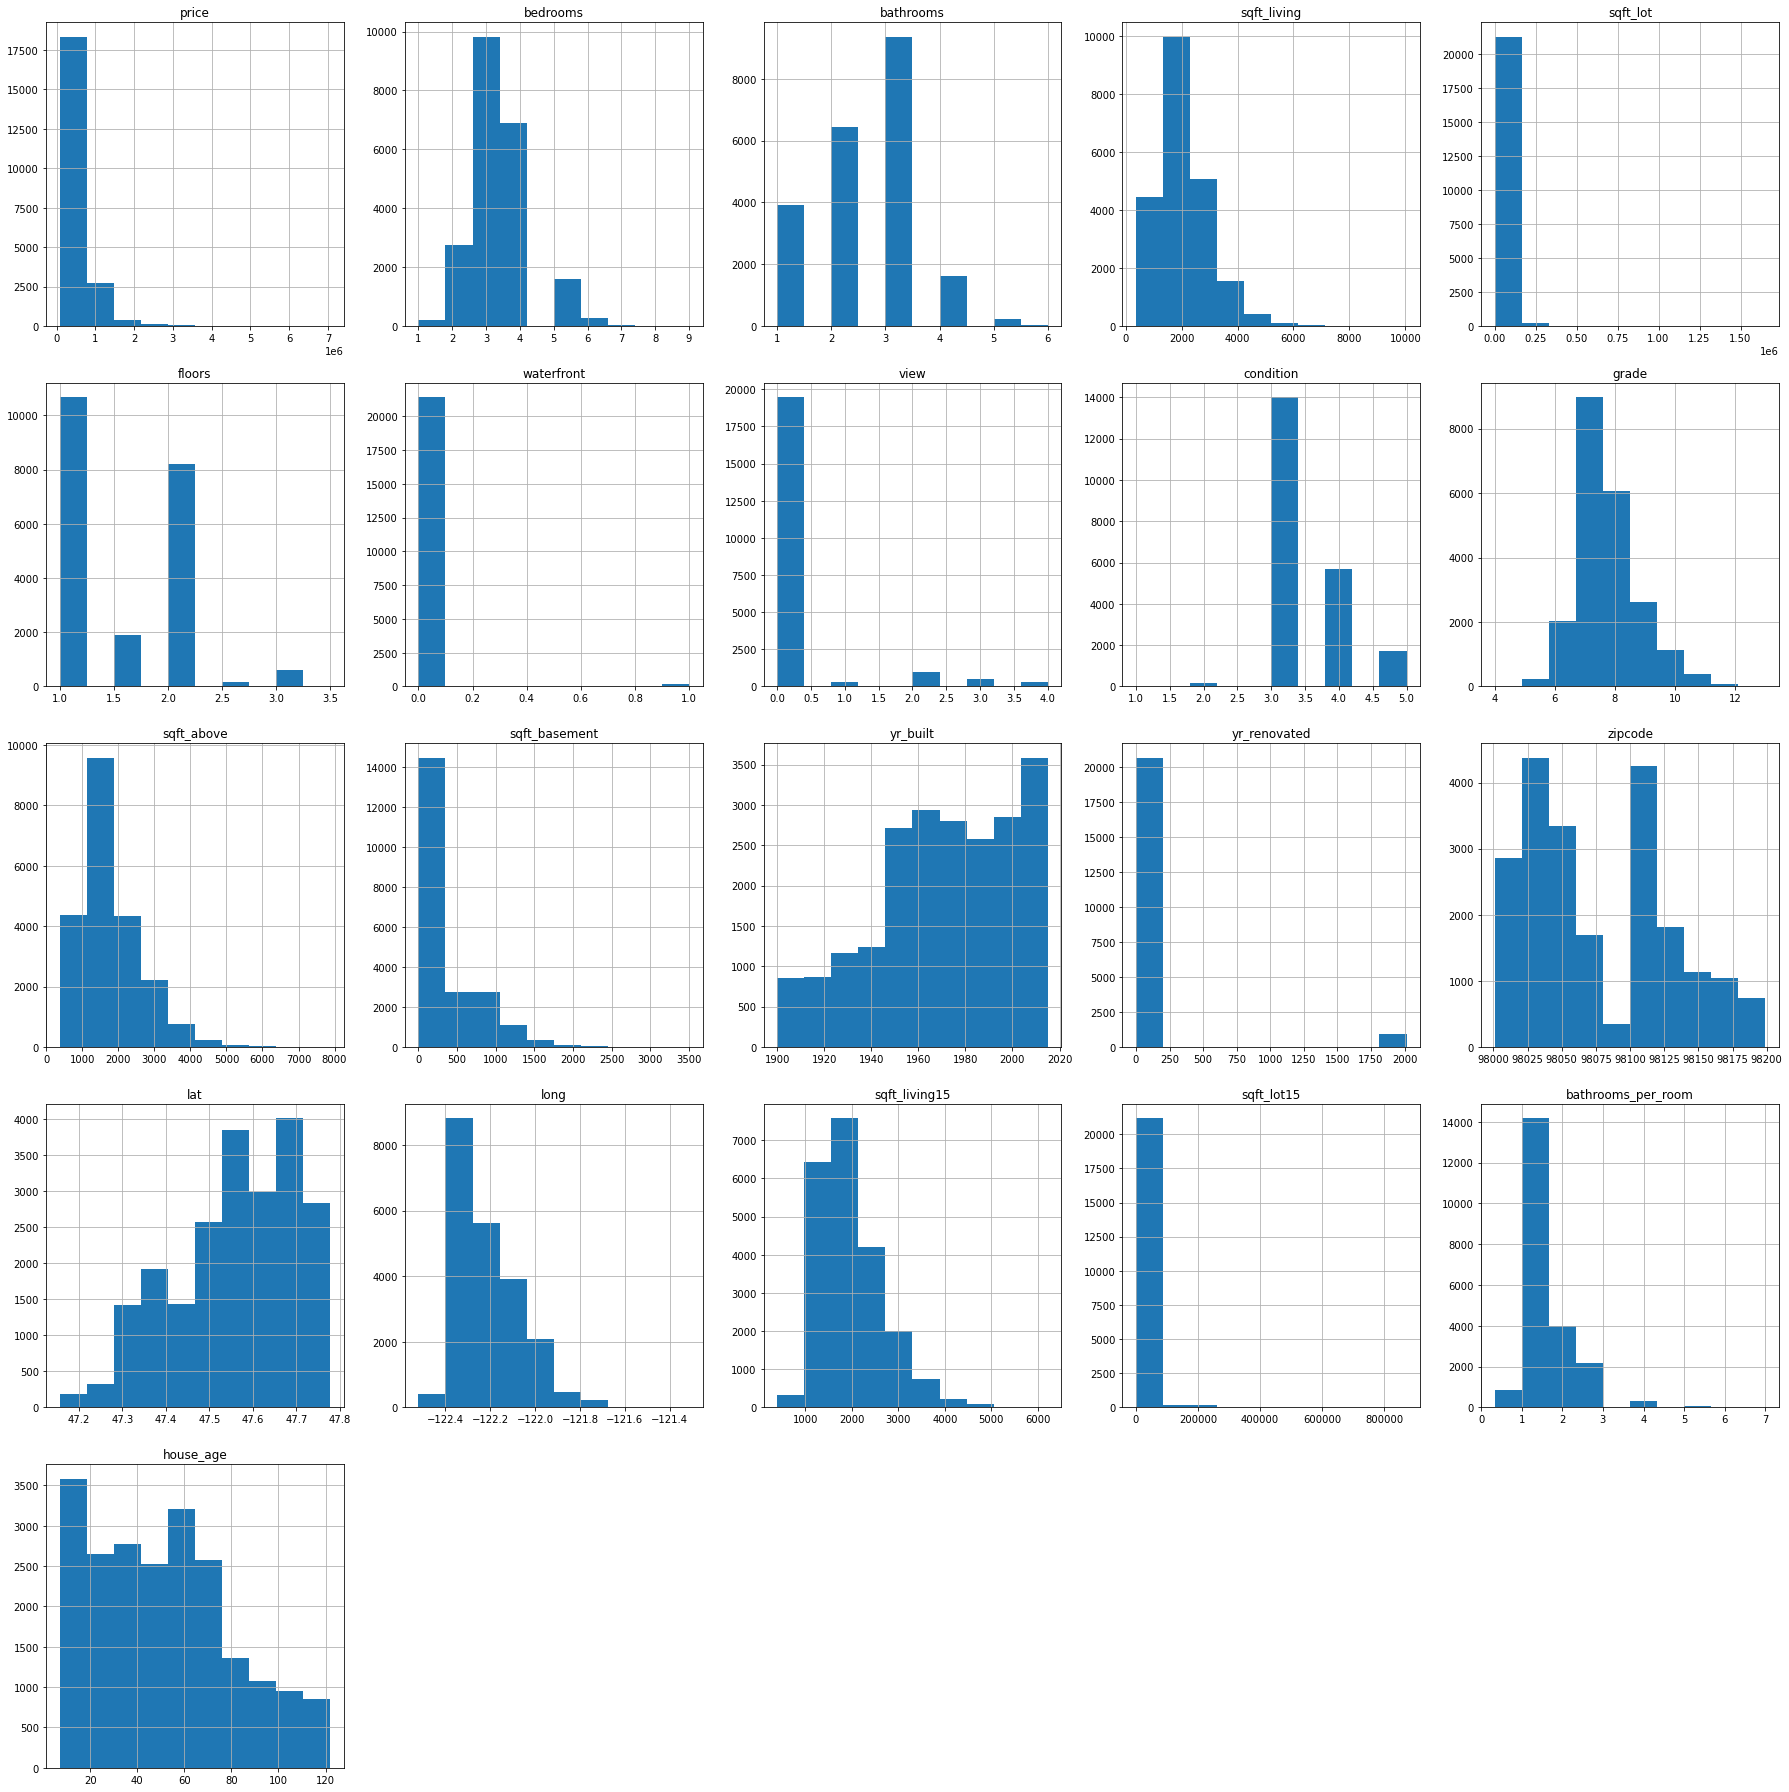

In [28]:
houseprice_df.hist(figsize=(25,25));
plt.ticklabel_format(style='plain')
plt.savefig('All_house_features_histplot.jpeg', dpi=150, bbox_inches='tight')
plt.tight_layout()
plt.show()


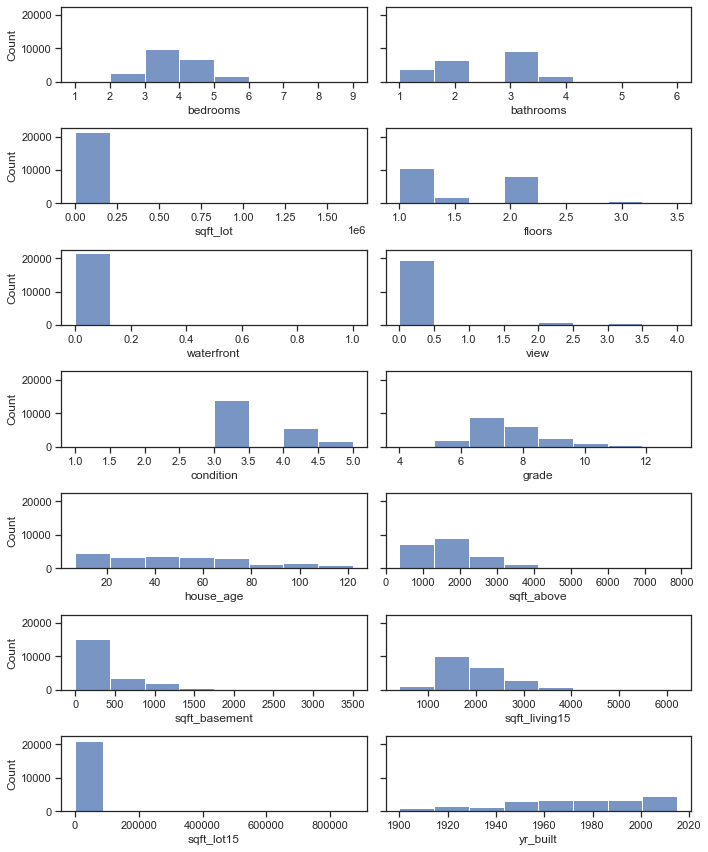

In [67]:
#Plotting histograms to see the distribution of the data
fig, axes = plt.subplots(nrows=7, ncols=2, sharey= True, figsize=(10,12))
fig.tight_layout()

sns.histplot(data=houseprice_df, x='bedrooms', ax=axes[0,0], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='bathrooms', ax=axes[0,1], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='sqft_lot', ax=axes[1,0], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='floors', ax=axes[1,1], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='waterfront', ax=axes[2,0], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='view', ax=axes[2,1], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='condition', ax=axes[3,0], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='grade', ax=axes[3,1], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='house_age', ax=axes[4,0], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='sqft_above', ax=axes[4,1], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='sqft_basement', ax=axes[5,0], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='sqft_living15', ax=axes[5,1], bins=8)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='sqft_lot15', ax=axes[6,0], bins=10)
plt.ticklabel_format(style='plain')

sns.histplot(data=houseprice_df, x='yr_built', ax=axes[6,1], bins=8)
plt.ticklabel_format(style='plain')

plt.savefig('Imp_features_histplot.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


# Bivariate Analysis

**Grade Vs Price**

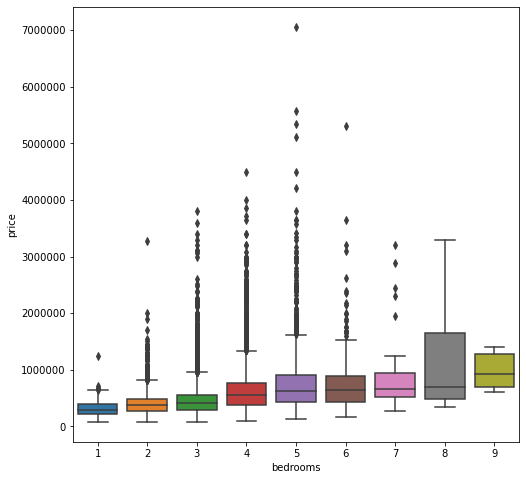

In [30]:
#Plotting boxplot with bedrooms on x-axis and price on y-axis
plt.figure(figsize=(8,8))
sns.boxplot(data=houseprice_df, x='bedrooms', y='price')
plt.ticklabel_format(axis="y", style='plain')
plt.savefig('box1.jpeg', dpi=100)
plt.show()

In [31]:
#Q1 = houseprice_df.price.quantile(0.25)
#Q3 = houseprice_df.price.quantile(0.75)
#IQR = Q3 - Q1
#Upper_range = Q3 + 3*IQR
#print(Upper_range)

In [32]:
#houseprice_df =houseprice_df[(houseprice_df.price > Upper_range)]

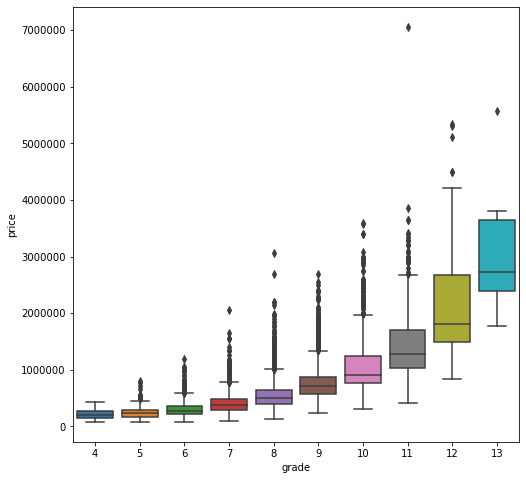

In [33]:
#Plotting boxplot with grade on x-axis and price on y-axis
plt.figure(figsize=(8,8))
sns.boxplot(data=houseprice_df, x='grade', y='price')
plt.ticklabel_format(axis="y", style='plain')
plt.savefig('grade_vs_price_outliers.jpeg', dpi=100)
plt.show()

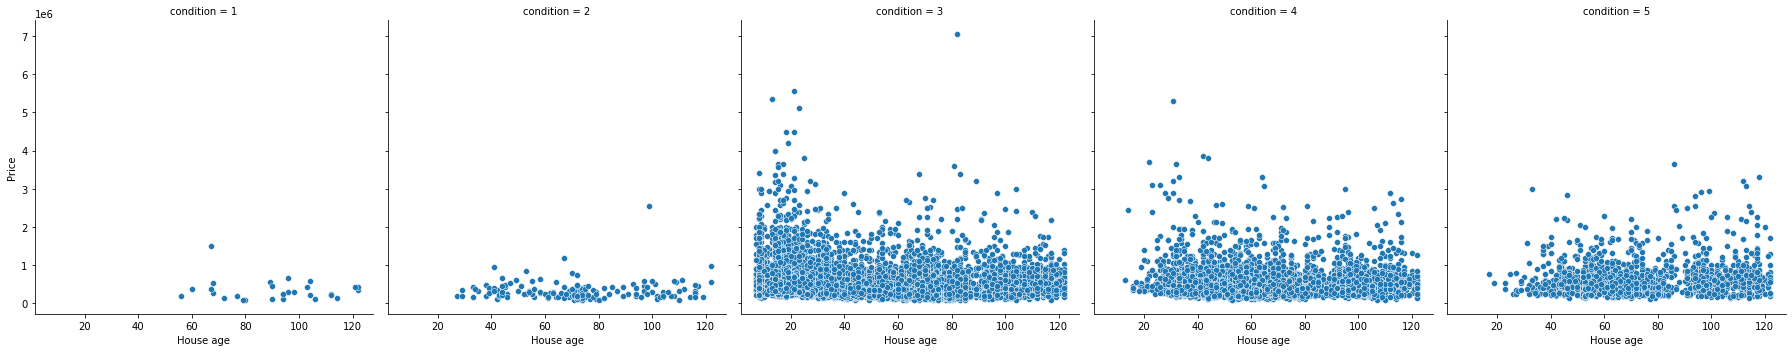

In [34]:
g = sns.relplot(data=houseprice_df, x="house_age", y="price", col="condition")
g.set_axis_labels("House age", "Price")

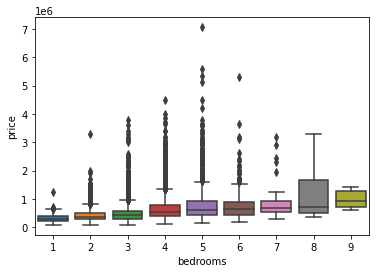

In [35]:
#Plotting boxplot with bedrooms on x-axis and price on y-axis
sns.boxplot(data=houseprice_df, x='bedrooms', y='price')
plt.savefig('Houseprice_outliers.jpeg', dpi=200)
plt.show()

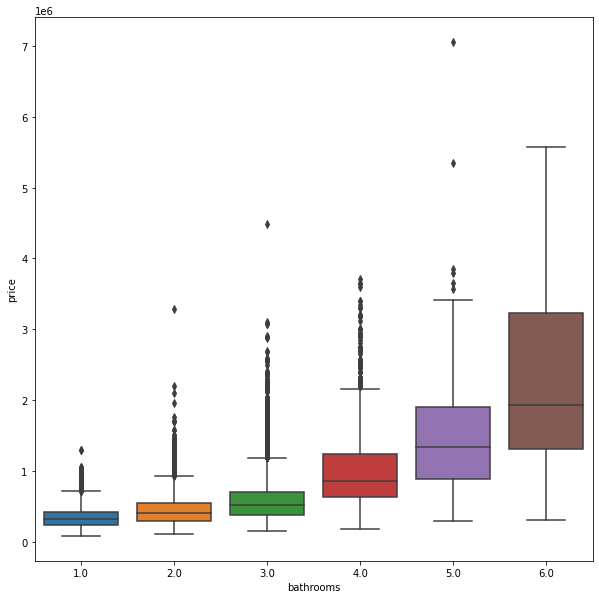

In [36]:
#Plotting boxplots by selecting number of bathrooms
plt.figure(figsize=(10,10))
sns.boxplot(data=houseprice_df, x='bathrooms', y='price')
plt.show()

## House size and space

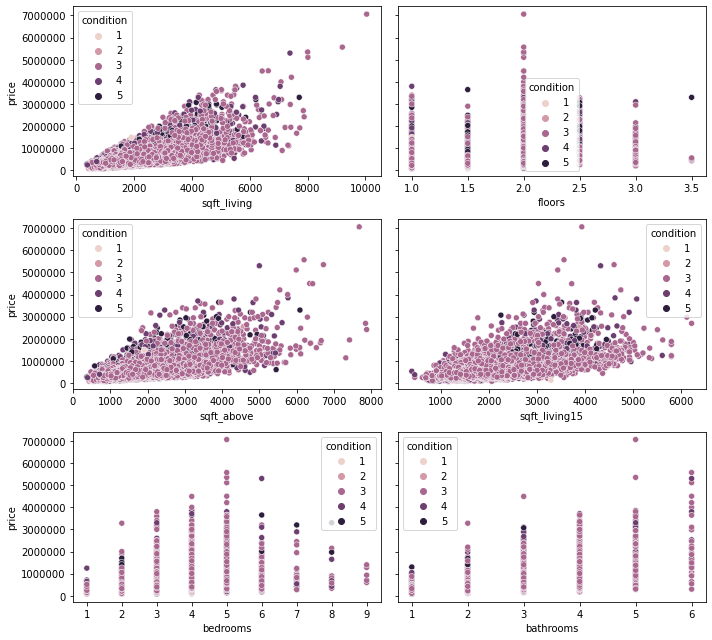

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey= True, figsize=(10,9))
fig.tight_layout()

sns.scatterplot(data=houseprice_df, x='sqft_living', y='price', hue= 'condition', ax=axes[0,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=houseprice_df, x='floors', y='price', hue= 'condition', ax=axes[0,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=houseprice_df, x='sqft_above', y='price', hue= 'condition', ax=axes[1,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=houseprice_df, x='sqft_living15', y='price', hue= 'condition', ax=axes[1,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=houseprice_df, x='bedrooms', y='price', hue= 'condition', ax=axes[2,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=houseprice_df, x='bathrooms', y='price', hue= 'condition', ax=axes[2,1])
plt.ticklabel_format(style='plain')
plt.savefig('House_size_price.jpeg', dpi=200, bbox_inches='tight')
plt.tight_layout()
plt.show()


## Facilities like waterfronts, basement and bathrooms

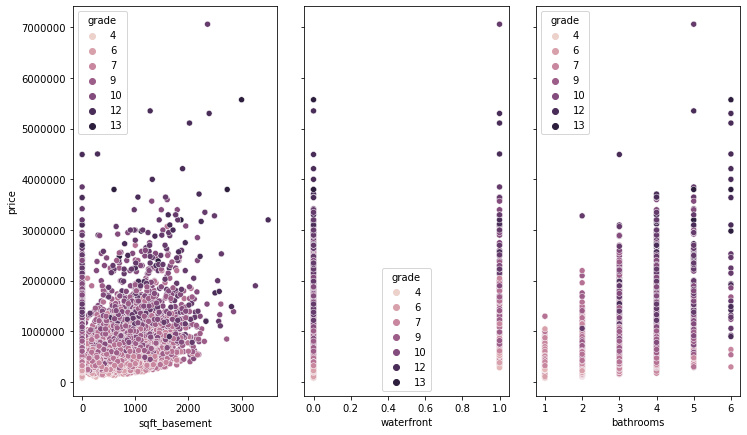

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey= True, figsize=(10,6))
fig.tight_layout()

sns.scatterplot(data=houseprice_df, x='sqft_basement', y='price',  hue= 'grade', ax=axes[0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=houseprice_df, x='waterfront', y='price', hue= 'grade', ax=axes[1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=houseprice_df, x='bathrooms', y='price',  hue= 'grade', ax=axes[2])
plt.ticklabel_format(style='plain')
plt.savefig('basement_waterfront_bathrooms.jpeg', dpi=200, bbox_inches='tight')
plt.show()

## Condition of house and age

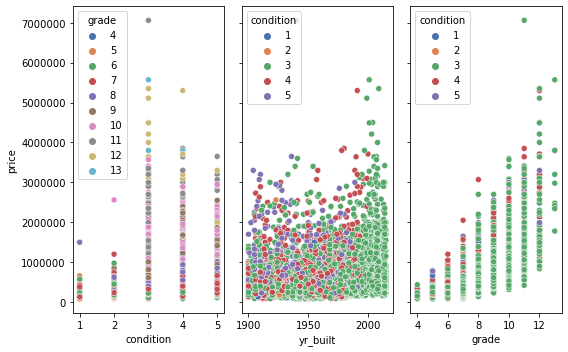

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey= True, figsize=(8,5))
sns.scatterplot(data=houseprice_df, x='condition', hue='grade', y='price', palette='deep', ax=axes[0])
sns.scatterplot(data=houseprice_df, x='yr_built', y='price',hue='condition',  palette='deep', ax=axes[1])
sns.scatterplot(data=houseprice_df, x='grade', y='price',hue='condition', palette='deep', ax=axes[2])
plt.ticklabel_format(style='plain')
fig.tight_layout()
plt.savefig('Condition_Grade_Age.jpeg', dpi=200, bbox_inches='tight')
plt.show()


<AxesSubplot:xlabel='yr_built', ylabel='price'>

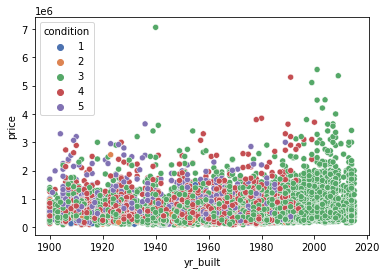

In [40]:
sns.scatterplot(data=houseprice_df, x='yr_built', hue='condition', y='price', palette="deep")

<AxesSubplot:xlabel='yr_built', ylabel='price'>

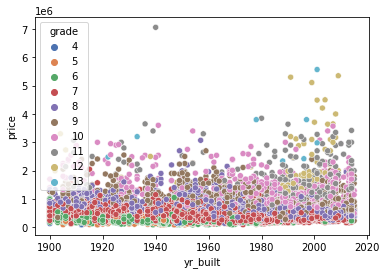

In [41]:
sns.scatterplot(data=houseprice_df, x='yr_built', hue='grade', y='price', palette="deep")

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

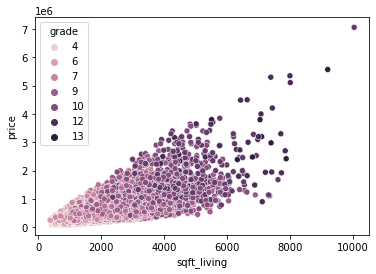

In [42]:
sns.scatterplot(data=houseprice_df, x='sqft_living', y='price', hue='grade')

## Condition, price, grade, and house age

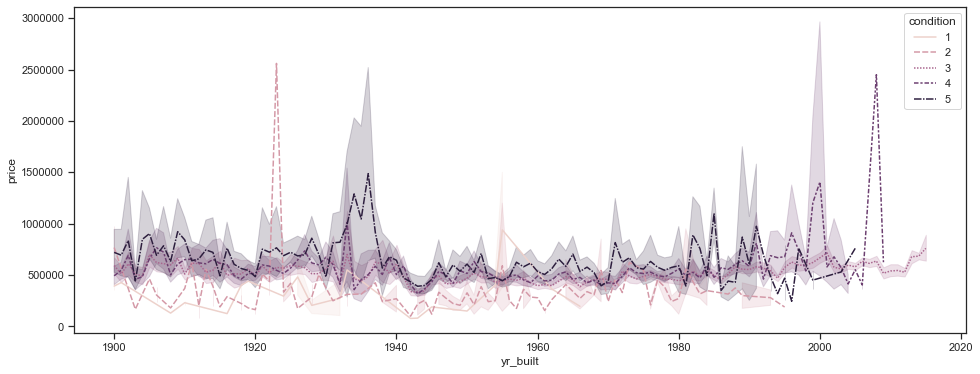

In [43]:
plt.figure(figsize=(16, 6))
sns.set(style="ticks")
sns.lineplot( data=houseprice_df, x="yr_built", y="price",hue='condition', style='condition')
plt.ticklabel_format(style='plain')
plt.show()

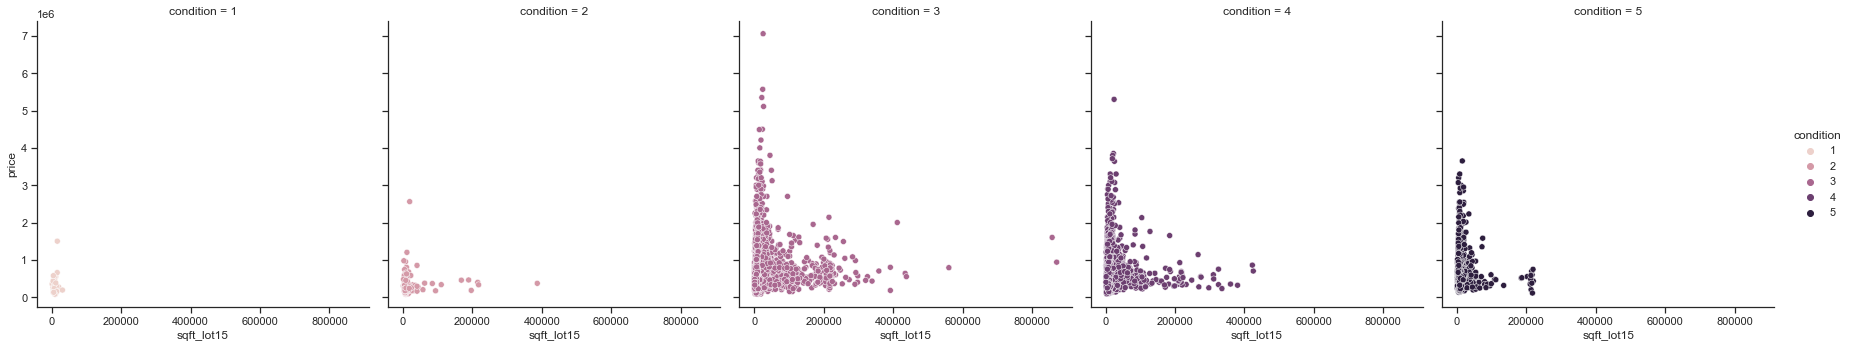

In [44]:
sns.relplot(data=houseprice_df, x="sqft_lot15", y="price",hue='condition', col='condition')

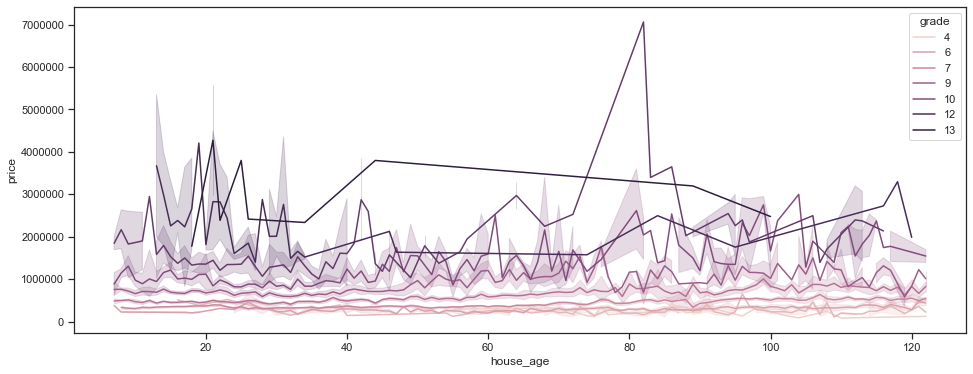

In [45]:
plt.figure(figsize=(16, 6))
sns.set(style="ticks")
g = sns.lineplot(x="house_age", y="price",hue='grade', data=houseprice_df)
plt.ticklabel_format(style='plain')
plt.show()

In [46]:
corr_matrix = houseprice_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                 1.000000
sqft_living           0.697189
grade                 0.671104
sqft_above            0.600123
sqft_living15         0.589677
bathrooms             0.487600
view                  0.395045
bedrooms              0.316035
sqft_basement         0.315754
lat                   0.312254
waterfront            0.267457
floors                0.259386
yr_renovated          0.121643
sqft_lot              0.088857
sqft_lot15            0.081330
yr_built              0.055135
condition             0.037730
long                  0.022853
zipcode              -0.053788
house_age            -0.055135
bathrooms_per_room   -0.248566
Name: price, dtype: float64

## Classifying houses

In [47]:
#houseprice_df["price_cat"] = pd.cut(houseprice_df["price"],bins=[0,1,2,3,4, np.inf],labels=[1, 2, 3,4,5])

In [48]:
#houseprice_df["price_cat"].value_counts()

In [49]:
kmeans_house = KMeans(n_clusters=3, max_iter=150, random_state=6)

In [50]:
kmeans_house.fit(houseprice_df)

KMeans(max_iter=150, n_clusters=3, random_state=6)

In [51]:
houseprice_df['Cluster_Id'] = kmeans_house.labels_

In [52]:
houseprice_df['Cluster_Id'].value_counts()

0    14852
1     6047
2      677
Name: Cluster_Id, dtype: int64

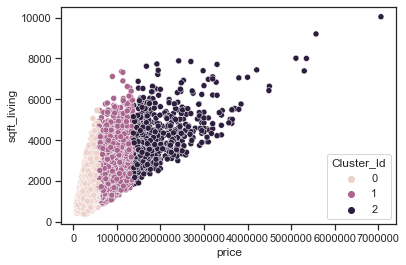

In [53]:
sns.scatterplot(data=houseprice_df, x='price', y='sqft_living', hue='Cluster_Id')
plt.savefig('kmeans_group_clusters_living.jpeg', dpi=100)
plt.ticklabel_format(style='plain')
plt.show()

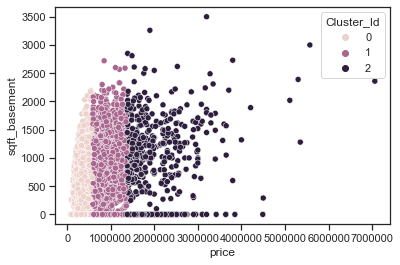

In [54]:
sns.scatterplot(data=houseprice_df, x='price', y='sqft_basement', hue='Cluster_Id')
plt.savefig('kmeans_group_clusters_basement.jpeg', dpi=100)
plt.ticklabel_format(style='plain')
plt.show()

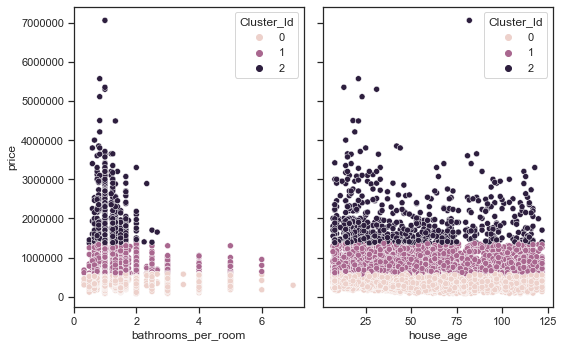

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(8,5))
sns.scatterplot(data=houseprice_df, x='bathrooms_per_room', hue='Cluster_Id', y='price', ax=axes[0])
sns.scatterplot(data=houseprice_df, x='house_age', y='price',hue='Cluster_Id', ax=axes[1])
plt.ticklabel_format(style='plain')
fig.tight_layout()
plt.savefig('Age_bpr_price.jpeg', dpi=200, bbox_inches='tight')
plt.show()

## Creating model with single feature

In [56]:
#Splitting data into training and test set
training_data,testing_data=train_test_split(houseprice_df,train_size=0.75,random_state=3)

#Creating a linear regression model
regression_model1=LinearRegression()

#Creating input and output variable for the model
x_training=np.array(training_data['sqft_living']).reshape(-1,1)
y_training=np.array(training_data['price']).reshape(-1,1)

#Fitting the model into training data
regression_model1.fit(x_training,y_training)

LinearRegression()

In [57]:
#Predicting the model that we built
x_testing=np.array(testing_data['sqft_living']).reshape(-1,1)
y_testing=np.array(testing_data['price']).reshape(-1,1)
y_prediction=regression_model1.predict(x_testing)

In [58]:
#Measuring model accuracy and performance
print('Mean Squared error of the model is: %.2f'%mean_squared_error(y_testing, y_prediction))
print('R2 score of the model is: %.2f'%r2_score(y_testing, y_prediction))
print('Mean absolute percentage error of the model is: %.2f'%mean_absolute_percentage_error(y_testing,y_prediction))
print('Coefficient:', regression_model1.coef_)
print('Intercept:', regression_model1.intercept_)

Mean Squared error of the model is: 65454574490.36
R2 score of the model is: 0.50
Mean absolute percentage error of the model is: 0.36
Coefficient: [[273.01773485]]
Intercept: [-26611.85019511]


## Creating module with multiple features

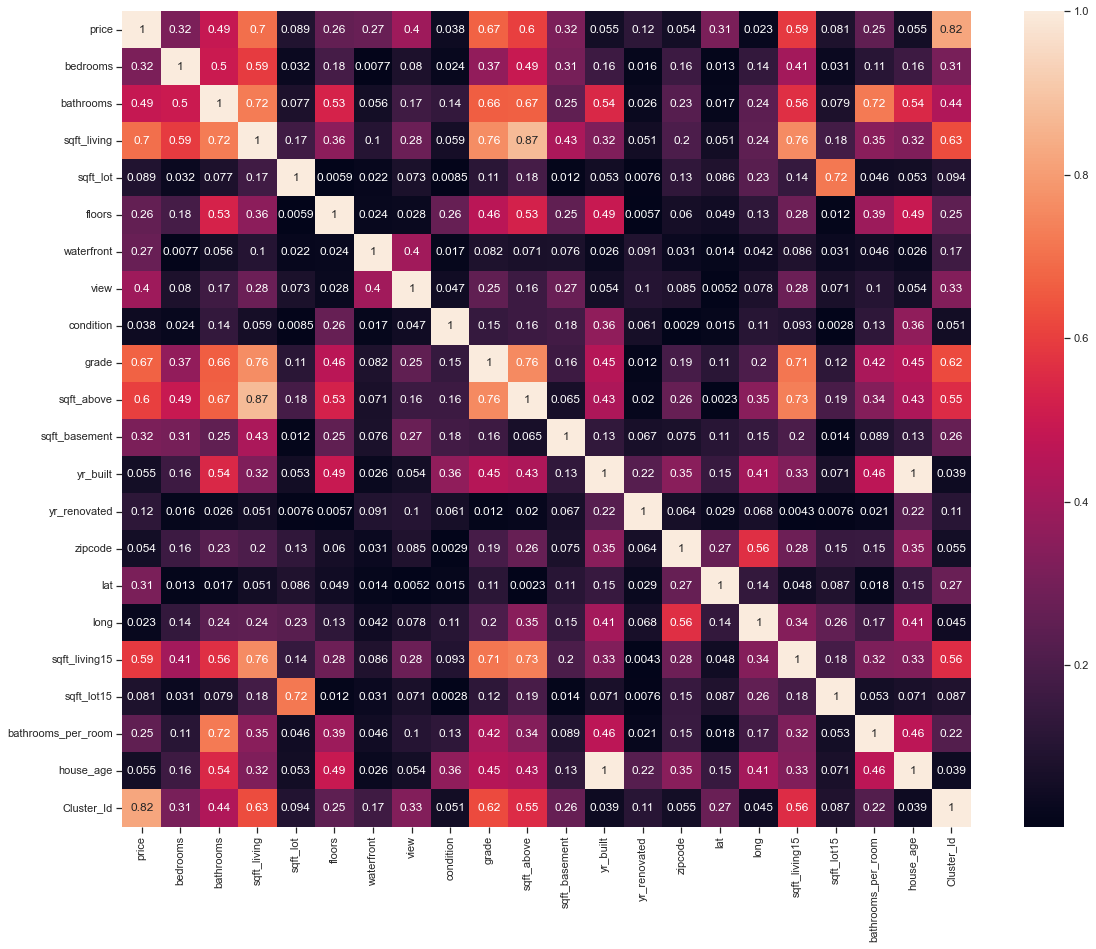

In [59]:
#Visualizing the feature's importance
correlation_matrix = houseprice_df.corr().abs()
plt.figure(figsize=(19,15))
sns.heatmap(data=correlation_matrix,annot=True)
plt.savefig('correlation_heatmap.jpeg', dpi=100)
plt.show()

In [60]:
#Creating features and output variables from our dataset
X = houseprice_df.drop(['price', 'yr_built', 'yr_renovated', 'sqft_basement'], 
                       axis=1)
y = houseprice_df['price']

In [61]:
#Printing datatypes of all features
print(houseprice_df.dtypes)

price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront              int64
view                    int64
condition               int64
grade                   int64
sqft_above              int64
sqft_basement           int64
yr_built                int64
yr_renovated            int64
zipcode                 int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
bathrooms_per_room    float64
house_age               int64
Cluster_Id              int32
dtype: object


In [62]:
#Standardizing features to get uniform data
X = StandardScaler().fit_transform(X)

In [63]:
#Lets split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=2)

In [64]:
#Creating linear regression object
regr = LinearRegression()

In [65]:
#Calculatinng model accuracy and performance
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_true = y_test
print('Mean Squared error of the model is: %.2f'%mean_squared_error(y_test, y_pred))
print('R2 score of the model is: %.2f'%r2_score(y_true, y_pred))
print('Mean absolute percentage error of the model is: %.2f'%mean_absolute_percentage_error(y_true,y_pred))
print('Coefficient:', regr.coef_)
print('Intercept:', regr.intercept_)

Mean Squared error of the model is: 27036403166.71
R2 score of the model is: 0.80
Mean absolute percentage error of the model is: 0.19
Coefficient: [-45771.72846055  52387.3938637   94392.36161471   2161.13788525
   -331.60118134  40968.6899304   22934.78186774   8280.90304929
  57729.19038184   8846.93815918 -21763.05894191  52644.7682448
 -22297.72544233   1959.09757716  -6010.89138293  37657.84063457
  36260.42047783 165423.40483757]
Intercept: 538640.6860665979
